In [ ]:
from google.colab import files

files.upload()

{}

In [1]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d sumithsingh/blood-cell-images-for-cancer-detection

Dataset URL: https://www.kaggle.com/datasets/sumithsingh/blood-cell-images-for-cancer-detection
License(s): Attribution 4.0 International (CC BY 4.0)


In [ ]:
!unzip blood-cell-images-for-cancer-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: basophil/BA_100102.jpg  
  inflating: basophil/BA_101381.jpg  
  inflating: basophil/BA_101611.jpg  
  inflating: basophil/BA_102039.jpg  
  inflating: basophil/BA_10622.jpg   
  inflating: basophil/BA_107595.jpg  
  inflating: basophil/BA_111710.jpg  
  inflating: basophil/BA_112418.jpg  
  inflating: basophil/BA_114542.jpg  
  inflating: basophil/BA_114899.jpg  
  inflating: basophil/BA_115323.jpg  
  inflating: basophil/BA_116477.jpg  
  inflating: basophil/BA_119131.jpg  
  inflating: basophil/BA_120278.jpg  
  inflating: basophil/BA_120688.jpg  
  inflating: basophil/BA_121453.jpg  
  inflating: basophil/BA_121897.jpg  
  inflating: basophil/BA_1223.jpg    
  inflating: basophil/BA_124389.jpg  
  inflating: basophil/BA_124620.jpg  
  inflating: basophil/BA_124938.jpg  
  inflating: basophil/BA_126411.jpg  
  inflating: basophil/BA_126424.jpg  
  inflating: basophil/BA_126839.jpg  
  inflating: basophil/BA_127306.jpg  

In [3]:
!unzip blood-cell-images-for-cancer-detection.zip -d blood_cancer_dataset

Streaming output truncated to the last 5000 lines.
  inflating: blood_cancer_dataset/basophil/BA_100102.jpg  
  inflating: blood_cancer_dataset/basophil/BA_101381.jpg  
  inflating: blood_cancer_dataset/basophil/BA_101611.jpg  
  inflating: blood_cancer_dataset/basophil/BA_102039.jpg  
  inflating: blood_cancer_dataset/basophil/BA_10622.jpg  
  inflating: blood_cancer_dataset/basophil/BA_107595.jpg  
  inflating: blood_cancer_dataset/basophil/BA_111710.jpg  
  inflating: blood_cancer_dataset/basophil/BA_112418.jpg  
  inflating: blood_cancer_dataset/basophil/BA_114542.jpg  
  inflating: blood_cancer_dataset/basophil/BA_114899.jpg  
  inflating: blood_cancer_dataset/basophil/BA_115323.jpg  
  inflating: blood_cancer_dataset/basophil/BA_116477.jpg  
  inflating: blood_cancer_dataset/basophil/BA_119131.jpg  
  inflating: blood_cancer_dataset/basophil/BA_120278.jpg  
  inflating: blood_cancer_dataset/basophil/BA_120688.jpg  
  inflating: blood_cancer_dataset/basophil/BA_121453.jpg  
  infl

In [4]:
!ls

blood_cancer_dataset  blood-cell-images-for-cancer-detection.zip  kaggle.json  sample_data


In [5]:
import os
# Print the contents of the current directory
print(os.listdir())

['.config', 'blood_cancer_dataset', 'blood-cell-images-for-cancer-detection.zip', '.ipynb_checkpoints', 'kaggle.json', 'sample_data']


In [7]:
import os
images_path = "blood_cancer_dataset"
subfolders = os.listdir(images_path)
print("Subfolder found:", subfolders)

Subfolder found: ['erythroblast', 'monocyte', 'myeloblast', 'basophil', 'seg_neutrophil']


In [8]:
sample_folder=os.path.join(images_path,subfolders[0])
images_files=os.listdir(sample_folder)
print("Images found:",images_files)

Images found: ['ERB_506915.jpg', 'ERB_444417.jpg', 'ERB_251659.jpg', 'ERB_649404.jpg', 'ERB_496835.jpg', 'ERB_424947.jpg', 'ERB_356501.jpg', 'ERB_428332.jpg', 'ERB_242525.jpg', 'ERB_193092.jpg', 'ERB_351768.jpg', 'ERB_297101.jpg', 'ERB_630246.jpg', 'ERB_316103.jpg', 'ERB_691430.jpg', 'ERB_174666.jpg', 'ERB_214210.jpg', 'ERB_160614.jpg', 'ERB_367386.jpg', 'ERB_305423.jpg', 'ERB_193374.jpg', 'ERB_101277.jpg', 'ERB_428119.jpg', 'ERB_565930.jpg', 'ERB_250013.jpg', 'ERB_646038.jpg', 'ERB_294305.jpg', 'ERB_237446.jpg', 'ERB_554438.jpg', 'ERB_317661.jpg', 'ERB_508787.jpg', 'ERB_144101.jpg', 'ERB_422942.jpg', 'ERB_157714.jpg', 'ERB_313180.jpg', 'ERB_527499.jpg', 'ERB_5436.jpg', 'ERB_111235.jpg', 'ERB_170918.jpg', 'ERB_425204.jpg', 'ERB_233.jpg', 'ERB_427244.jpg', 'ERB_243400.jpg', 'ERB_694444.jpg', 'ERB_386139.jpg', 'ERB_482788.jpg', 'ERB_174299.jpg', 'ERB_581746.jpg', 'ERB_423056.jpg', 'ERB_314544.jpg', 'ERB_507696.jpg', 'ERB_298962.jpg', 'ERB_482119.jpg', 'ERB_682893.jpg', 'ERB_335809.jpg', 

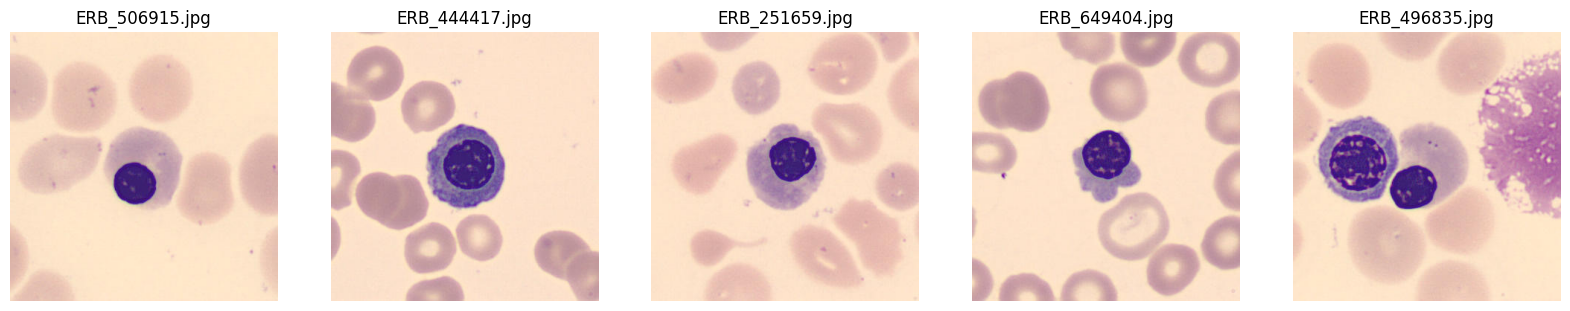

In [9]:
import cv2
import matplotlib.pyplot as plt


all_images=[]
for subfolder in subfolders:
  folder_path=os.path.join(images_path,subfolder)
  for image_name in os.listdir(folder_path):
    img_path=os.path.join(folder_path,image_name)
    all_images.append(img_path)

# display first few images

fig,axes=plt.subplots(1,5,figsize=(20,10))
for i,img_path in enumerate(all_images[:5]):
  img=cv2.imread(img_path)
  if img is None:
    print(f"Failed to load image: {img_path}")
    continue
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  axes[i].imshow(img)
  axes[i].axis("off")
  axes[i].set_title(os.path.basename(img_path))
plt.show()

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
Image_size=(128,128)
Dataset_path="blood_cancer_dataset"

In [12]:
class_names=os.listdir(Dataset_path)
print("Classes:",class_names)

Classes: ['erythroblast', 'monocyte', 'myeloblast', 'basophil', 'seg_neutrophil']


In [13]:
def load_dataset(image_size=Image_size):
    images = []
    labels = []
    for class_index, class_names in enumerate(os.listdir(Dataset_path)):
        class_folder = os.path.join(Dataset_path, class_names)
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            image = cv2.imread(image_path)

            if image is None:  # Check if 'image' is None, not 'img'
                print(f"Failed to load image: {image_path}")
                continue
            img = cv2.resize(image, Image_size)  # Now assign to 'img'
            img = img / 255.0

            images.append(img)
            labels.append(class_index)
    return np.array(images), np.array(labels)

In [14]:
X,y=load_dataset()
print("Total images",X.shape[0])

Total images 5000


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print("Train images:",X_train.shape[0])
print("Test images:",X_test.shape[0])

Train images: 4000
Test images: 1000


In [ ]:
# data Augementation

In [16]:
def create_model():
  model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
      MaxPooling2D((2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Flatten(),
      Dense(256, activation='relu'),
      Dropout(0.5),
      Dense(len(class_names), activation='softmax')
  ])

  model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model



In [17]:
model=create_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,517,317 (24.86 MB)

 Trainable params: 6,517,317 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
callbacks=[
    EarlyStopping(patience=5,restore_best_weights=True),
    ModelCheckpoint("best_model.h5",save_best_only=True)
]

In [19]:
history=model.fit(X_train,y_train,
                  validation_split=0.2,
                  epochs=20,
                  callbacks=callbacks)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3697 - loss: 1.4372

100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.3709 - loss: 1.4347 - val_accuracy: 0.7812 - val_loss: 0.7097
Epoch 2/20
 98/100 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7337 - loss: 0.7188

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7351 - loss: 0.7156 - val_accuracy: 0.8537 - val_loss: 0.4224
Epoch 3/20
 97/100 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8453 - loss: 0.4463

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8464 - loss: 0.4446 - val_accuracy: 0.9038 - val_loss: 0.2753
Epoch 4/20
 97/100 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9040 - loss: 0.3186

100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9040 - loss: 0.3179 - val_accuracy: 0.9237 - val_loss: 0.2516
Epoch 5/20
 97/100 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9265 - loss: 0.2484

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9264 - loss: 0.2485 - val_accuracy: 0.9237 - val_loss: 0.2279
Epoch 6/20
 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9237 - loss: 0.2246

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9238 - loss: 0.2245 - val_accuracy: 0.9337 - val_loss: 0.2112
Epoch 7/20
 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9445 - loss: 0.1877

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9445 - loss: 0.1876 - val_accuracy: 0.9513 - val_loss: 0.1535
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9598 - loss: 0.1466 - val_accuracy: 0.9450 - val_loss: 0.1607
Epoch 9/20
 97/100 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9522 - loss: 0.1422

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9524 - loss: 0.1418 - val_accuracy: 0.9600 - val_loss: 0.1149
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9614 - loss: 0.1237

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9614 - loss: 0.1238 - val_accuracy: 0.9638 - val_loss: 0.1099
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9621 - loss: 0.1224 - val_accuracy: 0.9638 - val_loss: 0.1100
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9684 - loss: 0.0985 - val_accuracy: 0.9625 - val_loss: 0.1127
Epoch 13/20
 97/100 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9596 - loss: 0.1108

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9598 - loss: 0.1106 - val_accuracy: 0.9663 - val_loss: 0.1039
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9705 - loss: 0.0994

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9705 - loss: 0.0994 - val_accuracy: 0.9663 - val_loss: 0.0966
Epoch 15/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9759 - loss: 0.0867

100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9759 - loss: 0.0867 - val_accuracy: 0.9712 - val_loss: 0.0798
Epoch 16/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9811 - loss: 0.0699 - val_accuracy: 0.9750 - val_loss: 0.0838
Epoch 17/20
 97/100 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9752 - loss: 0.0768

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9751 - loss: 0.0769 - val_accuracy: 0.9750 - val_loss: 0.0727
Epoch 18/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9771 - loss: 0.0700 - val_accuracy: 0.9700 - val_loss: 0.0856
Epoch 19/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9879 - loss: 0.0532 - val_accuracy: 0.9663 - val_loss: 0.0842
Epoch 20/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9844 - loss: 0.0468 - val_accuracy: 0.9725 - val_loss: 0.0766


In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9732 - loss: 0.0937

Test Accuracy: 97.20%


In [22]:
model.save("blood_cancer_cnn.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


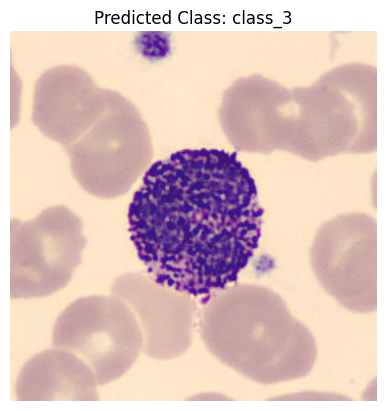

Prediction: class_3


In [31]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the trained model
MODEL_PATH = "blood_cancer_cnn.h5"
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Model file not found: {MODEL_PATH}")

# Load the model with input shape enforcement
model = load_model(MODEL_PATH, compile=False)  # Disable automatic compiling

# Ensure the model is compiled before prediction
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Class names (update accordingly)
class_names = ["basophil", "erythoblast", "monocyte", "myeloblast","seg_neutrophil"]

def predict_image(image_path, model, class_names):
    if not os.path.exists(image_path):
        print(f"Error: Image not found - {image_path}")
        return None

    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Failed to load image - {image_path}")
        return None

    # Convert BGR to RGB for correct color representation
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize to the correct model input size (128x128)
    img_resized = cv2.resize(img, (128, 128)) / 255.0  # Normalize
    img_expanded = np.expand_dims(img_resized, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_expanded)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

    return predicted_class
# Example image path
test_image_path = os.path.join("blood_cancer_dataset", "basophil", "BA_101381.jpg")

# Predict and print result
prediction = predict_image(test_image_path, model, class_names)
if prediction:
    print("Prediction:", prediction)
